In [3]:
import pandas as pd
import numpy as np

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [84]:
Seoul_income = pd.read_excel('./data/2021 지역사회조사_데이터.xlsx')

In [85]:
Seoul_income.head()

,ID,GU,FAM1,FAM15,SQ0_2,SQ0_3,TE1,BQ1_1,BQ1_2,BQ1_3,...,JEW2,JEW3,JEW4,JEW5,JEW6,JEW7,JEW8,wta2,wtb1,wtb2
0,1,110,2,2,1,1,1,7,6,7,...,6,2,6,1,110,1,3,0.906271,220.587656,1.079469
1,1,110,2,2,1,1,2,6,5,7,...,6,3,6,1,110,1,3,0.906271,179.406763,0.877946
2,2,110,1,1,1,2,1,7,6,7,...,4,3,6,2,110,1,2,0.464579,73.805978,0.361177
3,3,110,3,3,1,1,1,6,6,5,...,5,3,6,1,110,1,1,0.188537,52.521056,0.257017
4,3,110,3,3,1,1,2,7,6,7,...,5,2,6,1,110,1,4,0.188537,53.087902,0.259791


GU : 구 코드
AAQ1 : 월 평균 가구 소득

In [86]:
data = Seoul_income[['ID', 'GU', 'AAQ1']].drop_duplicates()
data

,ID,GU,AAQ1
0,1,110,7
2,2,110,9
3,3,110,10
6,4,110,8
8,5,110,10
...,...,...,...
40436,78145,680,5
40437,78147,545,10
40438,78148,590,4
40439,78151,620,4


In [87]:
data.rename(columns = {'GU' : '구', 'AAQ1' : '월평균가구소득'}, inplace = True)

In [88]:
data

,ID,구,월평균가구소득
0,1,110,7
2,2,110,9
3,3,110,10
6,4,110,8
8,5,110,10
...,...,...,...
40436,78145,680,5
40437,78147,545,10
40438,78148,590,4
40439,78151,620,4


In [92]:
pv = data.pivot_table('ID', index = '구', columns = '월평균가구소득', aggfunc='count')
pv.head()

월평균가구소득,1,2,3,4,5,6,7,8,9,10
구,,,,,,,,,,
110,3,10,28,55,81,58,68,69,55,93
140,3,7,56,91,87,67,57,28,28,56
170,3,28,40,91,101,78,74,73,59,108
200,9,7,42,68,93,112,112,83,63,116
215,9,13,56,151,136,107,113,56,36,103


In [102]:
pv.index = ['종로구',
'중구',
'용산구',
'성동구',
'광진구',
'동대문구',
'중랑구',
'성북구',
'강북구',
'도봉구',
'노원구',
'은평구',
'서대문구',
'마포구',
'양천구',
'강서구',
'구로구',
'금천구',
'영등포구',
'동작구',
'관악구',
'서초구',
'강남구',
'송파구',
'강동구']

In [103]:
pv

월평균가구소득,1,2,3,4,5,6,7,8,9,10
종로구,3,10,28,55,81,58,68,69,55,93
중구,3,7,56,91,87,67,57,28,28,56
용산구,3,28,40,91,101,78,74,73,59,108
성동구,9,7,42,68,93,112,112,83,63,116
광진구,9,13,56,151,136,107,113,56,36,103
동대문구,12,20,50,126,135,122,124,77,53,71
중랑구,8,16,48,150,152,133,155,77,31,70
성북구,16,23,44,123,140,144,138,73,44,105
강북구,15,13,52,91,136,106,92,98,38,99
도봉구,19,27,105,111,112,138,83,37,31,57


In [104]:
pv.to_csv('./data/income2021.csv')

In [105]:
import matplotlib.pyplot as plt #그래프 패키지 모듈 등록
%matplotlib inline 

In [106]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

<AxesSubplot:>

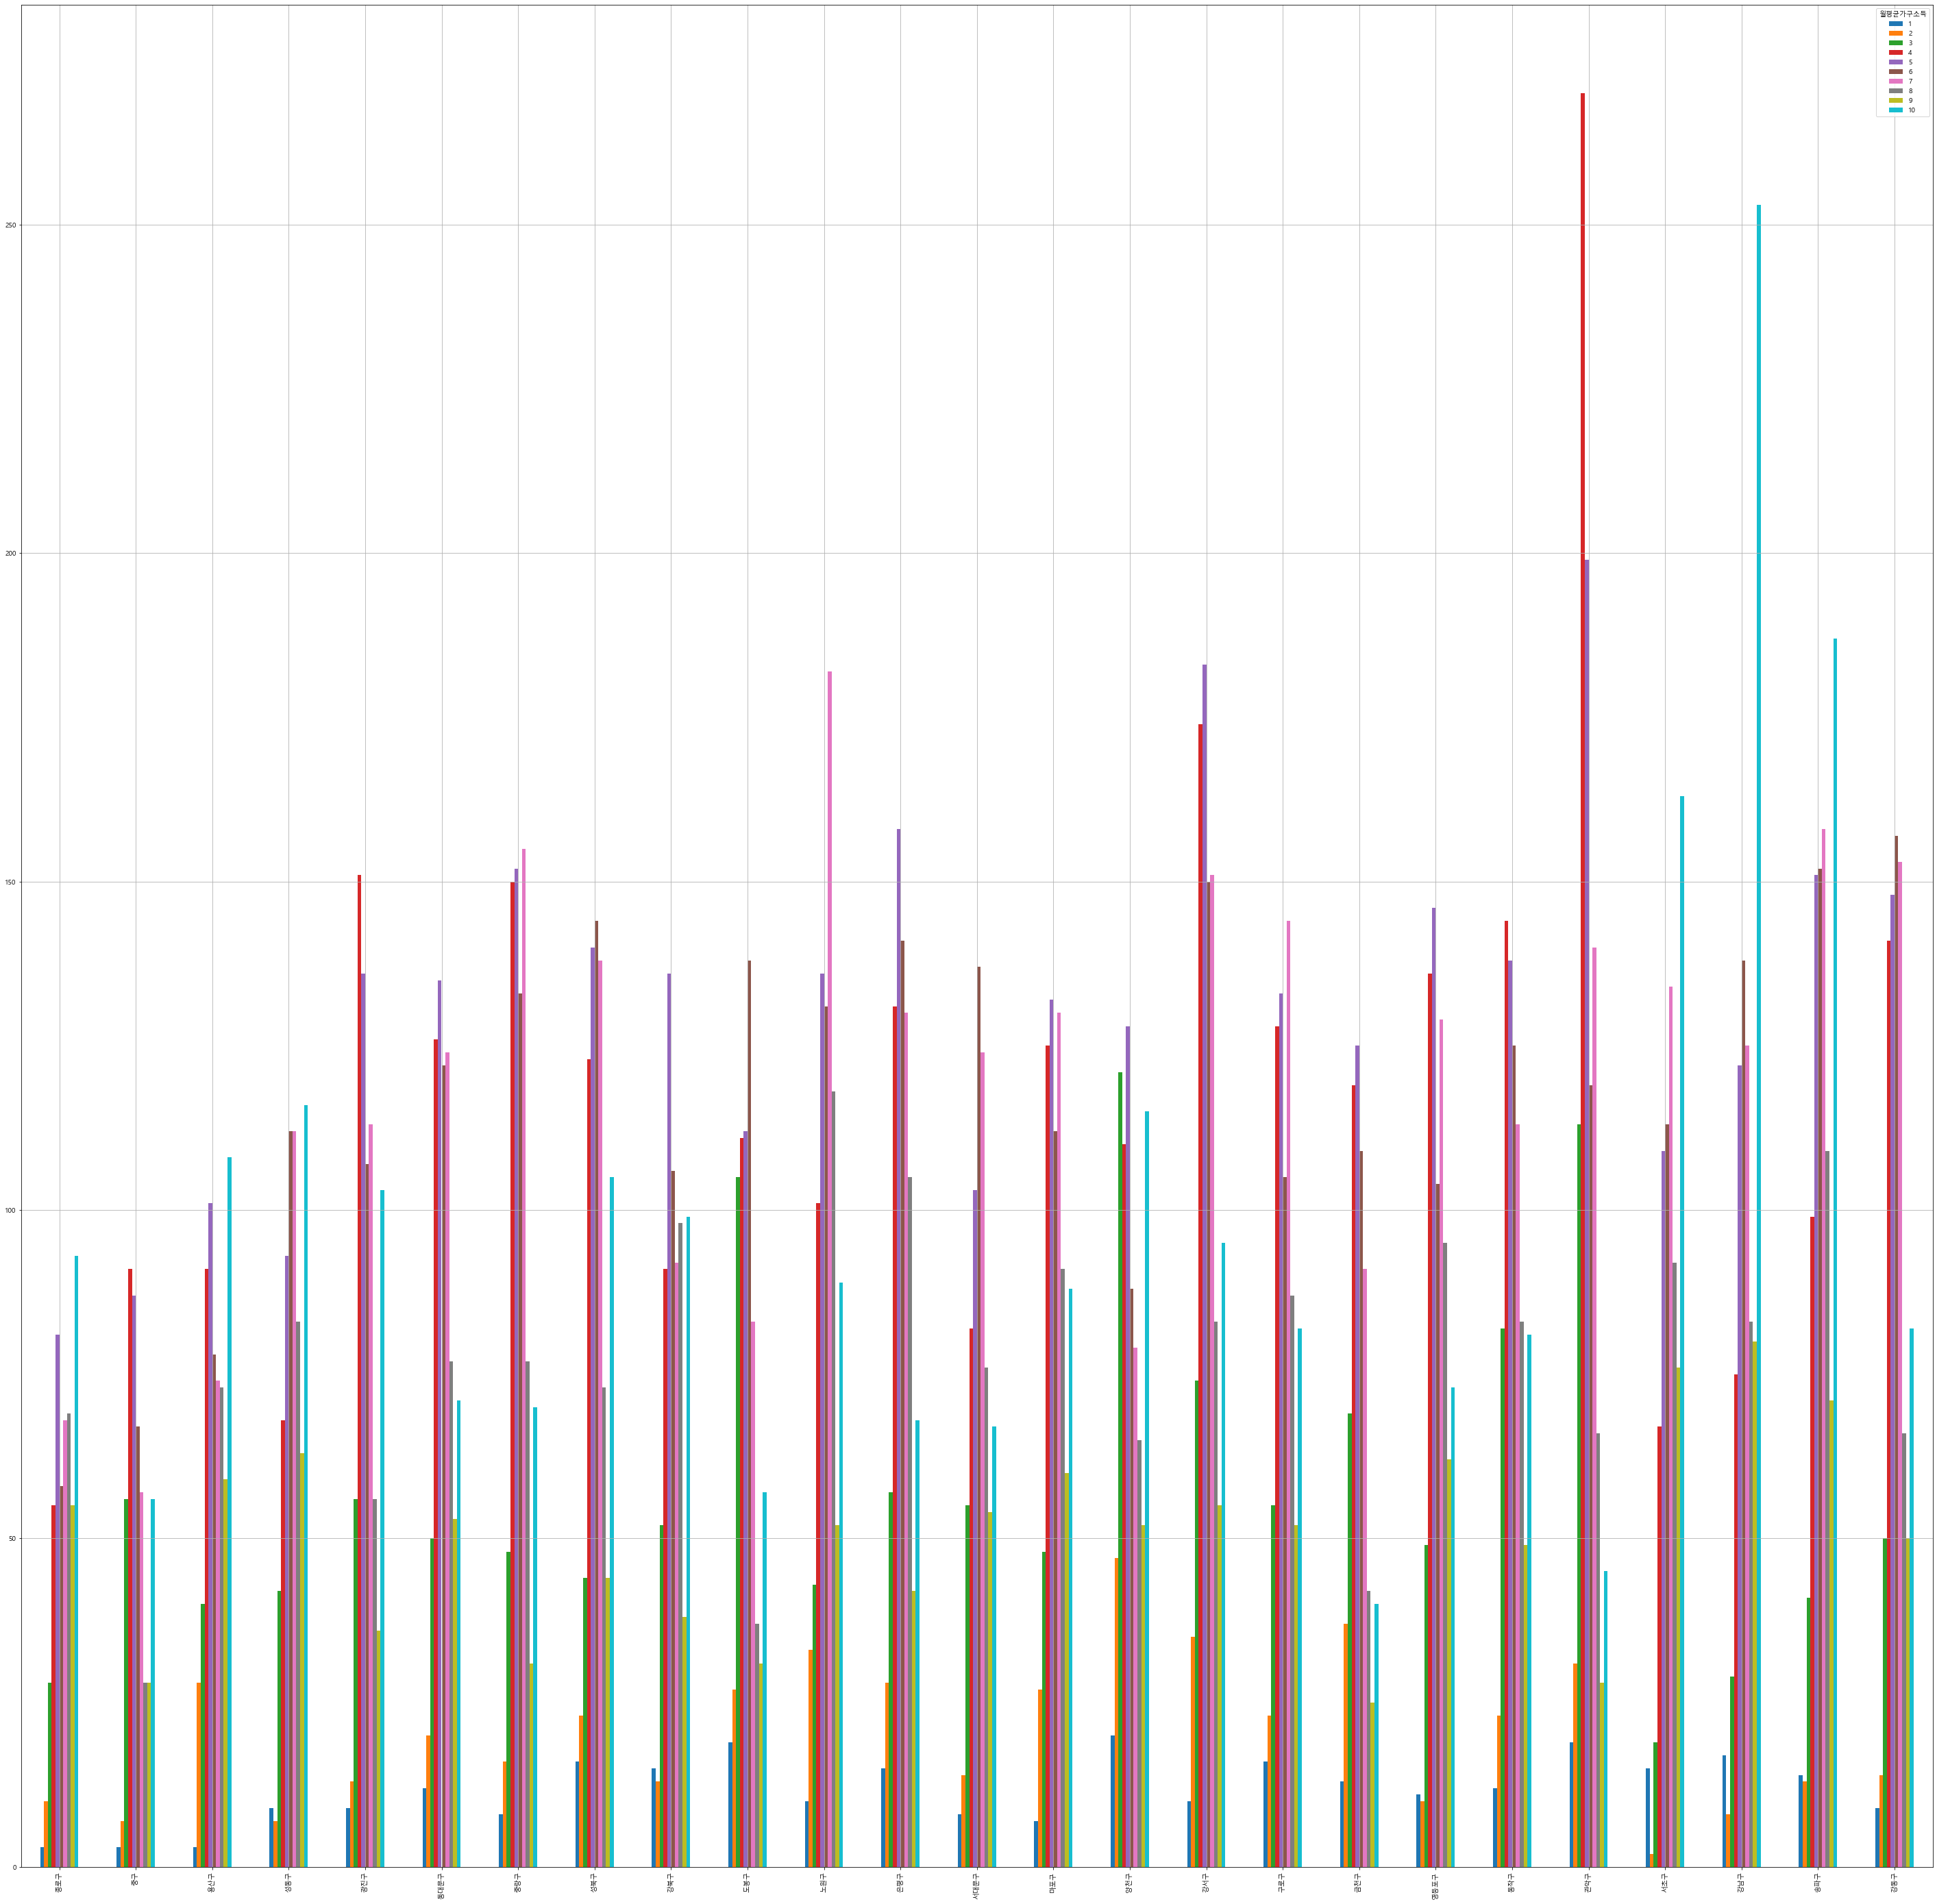

In [116]:
pv.plot(kind = 'bar', grid = True, figsize = (50, 50))